# Sumarise clinical features & case mutations / molecular phenotypes.

Here we want to sumarise some of the major clinical features.

### Demographics
- Race demographics (ethnicity_self_identified)
- Age (age) --> separate into young (< 50) mid (50 - 70), old (> 70)?
- BMI (BMI) --> separate into underweight (< 19) normal (19 - 25), pre-obese (26-30), obsesity class 1 (30 - 35), obesisty class 2 (35 - 40), obesity class 3) (41 - 49
- tumour stage (tumor_stage_pathological)
- tumour size (tumor_size_in_cm)
- white cell count (white_cell_count)  
- vital status (vital_status_at_12months_follow_up)


### Mutations
    - MTOR (5)
    - TP53 (6)
    - SETD2 (11)
    - BAP1 (14)
    - KDM5C (16)
    - PBRM1 (37)
    - VHL (73)
    - TTN (21)
    - CUBN (10)
    - BRCA2 (3)
    
### Molecular phenotypes
Here we have: 
- CIMP+ or CIMP-  
- Stable or unstable. 

### Clinical information

Downloaded information from (metadata files).
https://cptac-data-portal.georgetown.edu/study-summary/S050

Couldn’t find matching patient names between the clinical attributes in the protein data so had to down load the data from: https://cptac-data-portal.georgetown.edu/study-summary/S044


In [1]:
import pandas as pd
base_dir = '../data/S050_CCRCC_Clark_Cell2019/'
data_dir = f'{base_dir}downloaded_data/'
output_dir = f'{base_dir}sircle/'
# First we need to get demographic info from the clinical DF
clin_df = pd.read_csv(f'{data_dir}Patient_Clinical_Attributes.csv')
clin_mod_df = pd.DataFrame()

case_id = 'case_id'
gender = 'gender'
age = 'age'
age_grp = 'AgeGrouped'
race_grp = 'RaceGrouped'
bmi = 'BMI'
bmi_grp = 'BMIGrouped'
race = 'ethnicity_self_identified'
t_stage = 'tumor_stage_pathological'
t_size = 'tumor_size_in_cm'
cell_count = 'white_cell_count'
status = 'vital_status_at_12months_follow_up'

# Add in the base info to the our version of the clin df
clin_mod_df[case_id] = clin_df[case_id].values
clin_mod_df[gender] = clin_df[gender].values
clin_mod_df['TumorStage'] = clin_df[t_stage].values

age_grps = []
for a in clin_df[age]:
    if a == '>=90':
        age_grps.append('old')
    elif int(a) < 42:
        age_grps.append('young')
    elif int(a) < 58:
        age_grps.append('middle')
    elif int(a) < 90:
        age_grps.append('old')
    else:
        print(a)

bmi_grps = []
for a in clin_df[bmi]:
    if int(a) < 19:
        bmi_grps.append('underweight')
    elif int(a) < 25:
        bmi_grps.append('normal')
    elif int(a) < 30:
        bmi_grps.append('pre-obese')
    elif int(a) < 35:
        bmi_grps.append('obese-1')
    elif int(a) < 40:
        bmi_grps.append('obese-2')
    elif int(a) < 70:
        bmi_grps.append('obese-3')
    else:
        print('BMI', a)
        
bmi_grps = []
for a in clin_df[bmi]:
    if int(a) < 19:
        bmi_grps.append('normal')
    elif int(a) < 25:
        bmi_grps.append('normal')
    elif int(a) < 30:
        bmi_grps.append('between')
    elif int(a) < 35:
        bmi_grps.append('between')
    elif int(a) < 40:
        bmi_grps.append('obese')
    elif int(a) < 70:
        bmi_grps.append('obese')
    else:
        print('BMI', a)
clin_mod_df[age_grp] = age_grps
clin_mod_df[bmi_grp] = bmi_grps

# Make the race groups simplified
race_grp = 'RaceGrouped'
race_grps = []
for r in clin_df[race]:
    if r == 'Caucasian' or r == 'White' or r == 'American':
        race_grps.append('White')
    elif r == 'Slavonic':
        race_grps.append('Slavonic')
    elif r == 'Medical record does not state' or r == 'Patient not interviewed':
        race_grps.append('NA')
    elif r == 'Hispanic':
        race_grps.append('Hispanic')
    else:
        race_grps.append('Asian')
        print(r)
        
clin_mod_df[race_grp] = race_grps

# Print out the different groups
demo_cols = [age_grp, bmi_grp, race_grp, gender]
for d in demo_cols:
    print(clin_mod_df[d].value_counts())

Asian
Vietnam
Asian
Asian
Indian
old       66
middle    35
young      9
Name: AgeGrouped, dtype: int64
between    56
obese      33
normal     21
Name: BMIGrouped, dtype: int64
White       78
NA          12
Slavonic    11
Asian        5
Hispanic     4
Name: RaceGrouped, dtype: int64
Male      80
Female    30
Name: gender, dtype: int64


### Mutations

First we need to download all the mutations and make a dataframe based on these (only needs to be done once).

Then we want to look at all the different mutations and annote these to cases.

In [2]:
"""
We only want to do this once I keep it off by default :) 
"""
# Download mutation data
# Here we want to download the mutation files
from scidat.download import Download
from sciutil import SciUtil

supp_dir = f'{base_dir}supps/' # Where you need to put the GDC client
u = SciUtil()

case_ids = list(set(clin_mod_df[case_id].values))

download_mutation = False
if download_mutation:

    download = Download(f'{data_dir}RNA_clinical.csv', 
                        f'{data_dir}mutations/', 
                        f'{data_dir}mutations/', 
                        f'{supp_dir}gdc-client', 
                        max_cnt=1)
    download.download_data_using_api(case_ids, 'mutation')
else:
    u.dp(["You said you already have your mutations downloaded, if this isn't the case you'll need to do this!"])


--------------------------------------------------------------------------------
You said you already have your mutations downloaded, if this isn't the case you'll need to do this!	
--------------------------------------------------------------------------------


In [3]:
feq_mutations = pd.read_csv('/Users/ariane/Documents/code/sircle_meth/data/S050_CCRCC_Clark_Cell2019/downloaded_data/frequent-mutations.2022-03-06.tsv', sep='\t')
feq_mutations

,DNA Change,Type,Consequences,# Affected Cases in Cohort,# Affected Cases Across the GDC,Impact,Survival
0,chr1:g.76576946_76576947insAAAC,Insertion,Intron ST6GALNAC3,"16 / 336,4.76%","75 / 13,035",VEP: MODIFIER,add to survival plot
1,chr3:g.195783009C>T,Substitution,Synonymous MUC4 V2857V,"5 / 336,1.49%","57 / 13,035",VEP: LOW,add to survival plot
2,chr5:g.123023773delA,Deletion,3 Prime UTR PPIC,"4 / 336,1.19%","99 / 13,035",VEP: MODIFIER,add to survival plot
3,chr1:g.58480868delT,Deletion,3 Prime UTR OMA1,"3 / 336,0.89%","45 / 13,035",VEP: MODIFIER,add to survival plot
4,chr3:g.10142050C>A,Substitution,Stop Gained VHL S68*,"3 / 336,0.89%","3 / 13,035",VEP: HIGH,add to survival plot
5,chr3:g.10146516C>A,Substitution,Missense VHL H115N,"3 / 336,0.89%","3 / 13,035","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot
6,chr3:g.10142179G>A,Substitution,Missense VHL S111N,"3 / 336,0.89%","4 / 13,035","VEP: MODERATE, SIFT: tolerated - score 0.09, P...",add to survival plot
7,chr14:g.18974884_18974885insTTTTTA,Insertion,Intron POTEM,"3 / 336,0.89%","12 / 13,035",VEP: MODIFIER,add to survival plot
8,chr3:g.195783008A>G,Substitution,Missense MUC4 S2858P,"3 / 336,0.89%","59 / 13,035","VEP: MODERATE, PolyPhen: benign - score 0",add to survival plot
9,chr3:g.10146556T>A,Substitution,Missense VHL L128H,"3 / 336,0.89%","3 / 13,035","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot


In [20]:
dna_changes = []
changes = feq_mutations['DNA Change'].values
affected = feq_mutations['# Affected Cases in Cohort'].values
for i, mutation in enumerate(feq_mutations['Consequences'].values):
    if 'VHL' in mutation:
        dna_changes.append(changes[i])
        print(changes[i], affected[i])

chr3:g.10142050C>A 3 / 336,0.89%
chr3:g.10146516C>A 3 / 336,0.89%
chr3:g.10142179G>A 3 / 336,0.89%
chr3:g.10146556T>A 3 / 336,0.89%


In [32]:
# ssm.genomic_dna_change
import os
mutation_dir ='/Users/ariane/Documents/code/sircle_meth/data/S050_CCRCC_Clark_Cell2019/downloaded_data/mutations/'
mutation_files = os.listdir(mutation_dir)
gene_id = 'ssm.consequence.0.transcript.gene.symbol'

genes = ['MTOR', 'PTEN', 'VHL', 'PBRM1', 'KDM5C', 'CUBN', 'USH2A', 'SETD2', 'BAP1', 'MUC16']
for gene in genes:
    mutations = []
    change = 'ssm.genomic_dna_change'
    for f in mutation_files:
        df = pd.read_csv(f'{mutation_dir}{f}', sep='\t')
        df = df[df[gene_id] == gene]
        if len(df) > 0:
            mutations.append(df['ssm.genomic_dna_change'].values[0])
    print(gene, len(mutations), len(set(mutations)))

MTOR 5 5
PTEN 5 5
VHL 73 66
PBRM1 37 37
KDM5C 16 16
CUBN 10 10
USH2A 10 10
SETD2 11 11
BAP1 14 14
MUC16 12 12


In [33]:
gene = 'VHL'
mutations = []
change = 'ssm.genomic_dna_change'
for f in mutation_files:
    df = pd.read_csv(f'{mutation_dir}{f}', sep='\t')
    df = df[df[gene_id] == gene]
    if len(df) > 0:
        mutations.append(df['ssm.genomic_dna_change'].values[0])
print(gene, len(mutations), len(set(mutations)))

VHL 73 66


In [42]:
dna_changes

['chr3:g.10142050C>A',
 'chr3:g.10146516C>A',
 'chr3:g.10142179G>A',
 'chr3:g.10146556T>A']

In [44]:
mutations_count = {}
for m in mutations:
    if m in mutations_count:
        mutations_count[m] += 1
    else:
        mutations_count[m] = 1
mutations_count

{'chr3:g.10142041C>T': 2,
 'chr3:g.10142113T>C': 2,
 'chr3:g.10142068T>A': 1,
 'chr3:g.10142107delTA': 1,
 'chr3:g.10149850delG': 1,
 'chr3:g.10142078C>A': 1,
 'chr3:g.10149834delA': 1,
 'chr3:g.10149804C>T': 2,
 'chr3:g.10142092G>C': 1,
 'chr3:g.10142061T>C': 1,
 'chr3:g.10142018delGCGGCCGCGGCCCGTGCTGCGCTCGGT': 1,
 'chr3:g.10146543A>C': 1,
 'chr3:g.10146565A>T': 1,
 'chr3:g.10142127G>T': 2,
 'chr3:g.10146636G>C': 1,
 'chr3:g.10142008_10142009insG': 1,
 'chr3:g.10146516C>T': 1,
 'chr3:g.10142136delC': 1,
 'chr3:g.10146518C>A': 1,
 'chr3:g.10146636G>A': 2,
 'chr3:g.10146523G>A': 1,
 'chr3:g.10142014_10142015insCG': 1,
 'chr3:g.10142117delCTTCGACGGCGAG': 1,
 'chr3:g.10149920delGC': 1,
 'chr3:g.10142116A>T': 1,
 'chr3:g.10142125G>T': 1,
 'chr3:g.10149856T>C': 1,
 'chr3:g.10142147delG': 1,
 'chr3:g.10142110G>C': 1,
 'chr3:g.10149808G>A': 1,
 'chr3:g.10142173_10142174insCCACAGCTA': 1,
 'chr3:g.10142055G>T': 2,
 'chr3:g.10146559delTGGT': 1,
 'chr3:g.10142110G>A': 1,
 'chr3:g.10146592delT': 1

In [45]:
for mutation in dna_changes:
    if mutation in mutations_count:
        mutations_count[mutation] += 3
    else:
        mutations_count[mutation] = 3

In [46]:
# Now let's just look at the 1000 bases
bases = []
for mutation in mutations_count:
    if mutations_count[mutation] > 1:
        base = mutation.split('.')[1]
        if 'del' in base:
            base = base.split('del')[0]
        elif '>' in base:
            base = base.split('>')[0]
        elif 'ins' in base:
            base = base.split('_')[0]
        base = base.replace('A', '').replace('T', '').replace('C', '').replace('G', '')
        bases.append(int(base))
        print(mutation, base, mutations_count[mutation])
bases

chr3:g.10142041C>T 10142041 2
chr3:g.10142113T>C 10142113 2
chr3:g.10149804C>T 10149804 2
chr3:g.10142127G>T 10142127 2
chr3:g.10146636G>A 10146636 2
chr3:g.10142055G>T 10142055 2
chr3:g.10142109T>C 10142109 2
chr3:g.10142179G>A 10142179 4
chr3:g.10142050C>A 10142050 3
chr3:g.10146516C>A 10146516 3
chr3:g.10146556T>A 10146556 3


[10142041,
 10142113,
 10149804,
 10142127,
 10146636,
 10142055,
 10142109,
 10142179,
 10142050,
 10146516,
 10146556]

In [27]:
## Mutation start

In [3]:
# Set up the mutation stuff (already downloaded mutation info in the processing dir)
from scidat.api import API, APIException

tcga_data_dir = f'{base_dir}downloaded_data/TCGA/'
gdc_client = f'{tcga_data_dir}./gdc-client'
sample_file = f'{tcga_data_dir}gdc_sample_sheet.2021-05-03.tsv'
manifest_file = f'{tcga_data_dir}gdc_manifest_20210503_065756.txt'
annotation_file = f'{tcga_data_dir}tcga_hsapiens_gene_ensembl-GRCh38.p13.csv'
clinical_file = f'{tcga_data_dir}clinical.cart.2021-05-03/clinical.tsv'

api = API(manifest_file, gdc_client, clinical_file, sample_file, data_dir, data_dir, annotation_file,
                            max_cnt=10, requires_lst=['counts'])

mutation_dir = f'{data_dir}mutations/'
api.build_mutation_df(mutation_dir)

# Now we want to build a dictionary with mutations and cases.
filter_col = 'ssm.consequence.0.transcript.gene.symbol'
genes_with_mutations = api.get_mutation_values_on_filter('ssm.consequence.0.transcript.gene.symbol', [''], 'ssm.consequence.0.transcript.gene.symbol')

# Now for each gene we want to count the patients with mutations
cases_w_mutations = {}
for g in genes_with_mutations:
    cases = api.get_mutation_values_on_filter('case_id', [g], filter_col, exact=True)
    cases_w_mutations[g] = cases


# Sort keys by the genes with most mutations
sorted_genes_w_mutations = sorted(cases_w_mutations, key=lambda k: len(cases_w_mutations[k]), reverse=True)

# Print these out!
for g in sorted_genes_w_mutations:
    print(g, len(cases_w_mutations[g]))

VHL 73
PBRM1 37
TTN 21
KDM5C 16
BAP1 14
CSMD3 12
MUC16 12
SETD2 11
CUBN 10
USH2A 10
TNRC18 8
MALAT1 8
RELN 7
MACF1 7
SYNE1 7
LRP2 7
BIRC6 7
CCDC168 6
KIF1B 6
DST 6
RSF1 6
TP53 6
PCLO 6
SYNE2 5
ANK3 5
SVEP1 5
GOLGB1 5
PIKFYVE 5
PKHD1 5
MUC17 5
HSPA8 5
ARHGAP32 5
KMT2C 5
PCDHB6 5
HECW1 5
FCGBP 5
OPTN 5
YLPM1 5
ADAMTS20 5
RYR2 5
OBSCN 5
RPRD2 5
VAPB 5
PTEN 5
PCDH15 5
NEB 5
TNKS 5
XIRP2 5
CSMD2 5
PITPNM2 5
FAT2 5
HMCN1 5
MYO16 5
MTOR 5
FAT1 5
SMG1 4
FSIP2 4
FAT3 4
RAD54L 4
COL22A1 4
CACNA1H 4
NLRP12 4
IGKC 4
SF3B1 4
KIAA1755 4
WWC3 4
TERT 4
CUL9 4
ANKRD26 4
ASTN1 4
MAP1A 4
CHD6 4
AKAP13 4
FAM179B 4
SYCP2L 4
ZNF292 4
PIEZO1 4
UNC80 4
ZNF91 4
COLEC11 4
DGKZ 4
CAND1 4
LIF 4
DNAH17 4
PHTF1 4
TNC 4
CHD3 4
PCDH7 4
SLC4A4 4
PCDH20 4
CHD9 4
NELL2 4
AUTS2 4
CHUK 4
RALGAPB 4
PKD1 4
KIAA1109 4
USP34 4
CCIN 4
ACACA 4
UNC13B 4
DYNC1H1 4
ABCC12 4
TTC3 4
MALRD1 4
ACBD5 4
PPWD1 4
KIAA0100 4
KCNH5 4
LAMB4 4
VPS13D 4
DNAH5 4
SORBS2 4
HECTD4 4
MAPT 4
KDM2B 4
KCNA4 4
NAV3 4
TMEM108 4
MON2 4
AHCTF1 4
CHRNA4 4


XRN2 1
IGSF1 1
KRCC1 1
C4orf33 1
FN1 1
AP3B1 1
GLIS1 1
HKR1 1
IL21 1
AP3D1 1
PEPD 1
RP11-407N17.3 1
RNF14 1
ZNF25 1
TOMM20 1
BEND6 1
COL7A1 1
F8A1 1
TTC13 1
SIX4 1
RHCG 1
TRIM10 1
CHD1 1
SMARCD2 1
TCF25 1
TRMT6 1
PLEKHM2 1
GFM2 1
C1GALT1 1
DIO3 1
PROX2 1
BSCL2 1
PDZD7 1
TM2D2 1
MRPL10 1
SLC26A1 1
LPIN3 1
GULP1 1
DISP2 1
E2F2 1
PRDX1 1
ADGRE4P 1
PIGR 1
P2RX7 1
SLC19A2 1
MARCH8 1
KIAA0825 1
LIFR 1
HAS1 1
GPR162 1
VN1R4 1
PCDHB7 1
HSP90B1 1
LRRC28 1
EGR4 1
ATXN7L3B 1
DDX18 1
PCSK7 1
LRRC75A 1
RANBP9 1
P2RX4 1
LYZL2 1
ZNF865 1
NEFH 1
XDH 1
VNN1 1
OR9G1 1
ADAM33 1
CPLX2 1
SLC35F6 1
CELP 1
C11orf57 1
TIGD6 1
ANKHD1-EIF4EBP3 1
SAP30L 1
IGSF5 1
MTPN 1
OR6M1 1
CREB5 1
APOBEC1 1
ITGA2B 1
KIF16B 1
KCTD20 1
NOM1 1
NRAP 1
EBAG9 1
TMEM210 1
PCSK1 1
DCXR 1
BAIAP2 1
MYT1L 1
MMP13 1
CEP192 1
PSTPIP1 1
SLC16A11 1
KIAA1217 1
AIM1 1
MKL2 1
RRP9 1
PFDN2 1
MBD6 1
FAM204A 1
OTOA 1
SH2D4B 1
AGL 1
MYCT1 1
JPH4 1
CROT 1
TLN1 1
THBS2 1
TRNT1 1
DNAJB14 1
PANX3 1
AC011525.2 1
UBE2D3 1
FHL1 1
HIST1H3A 1
CFAP58 1
NA

GRAP2 1
RAD21L1 1
SLC35G3 1
CTSD 1
HERC3 1
SLC9A7P1 1
MON1A 1
PSD 1
SH3KBP1 1
SLC37A3 1
FSD1 1
TM4SF1 1
ZNF665 1
OAT 1
CEP350 1
MSANTD1 1
ULK2 1
KDM5A 1
ENPP3 1
KLHDC7A 1
SAFB 1
ELN 1
CDC42BPG 1
NAGA 1
HUS1 1
SRRT 1
BAG2 1
C19orf47 1
HFE2 1
ADIPOR2 1
TCN1 1
MRPL27 1
PVRL1 1
CREBL2 1
SMARCD3 1
NAT10 1
PSMB4 1
SLC32A1 1
PTPN13 1
IRGM 1
AC007792.1 1
NBN 1
SPEN 1
NOTCH4 1
C1QL4 1
CDC16 1
DPT 1
NGFR 1
KRT32 1
SLC35B1 1
CCR7 1
NPY1R 1
GLRX 1
INTS2 1
APCDD1L 1
PHLPP1 1
ARMCX4 1
DIS3 1
AMN 1
OR5P3 1
ANKRD24 1
ZNF714 1
RUNX2 1
MAP4K1 1
KMT2B 1
TMEM245 1
TNFRSF25 1
IER5 1
FOLR2 1
FNDC1 1
TGFBR3 1
CRB1 1
MEF2A 1
POFUT2 1
OR10A3 1
ECI2 1
DNAJC11 1
MRPL16 1
COX15 1
SLC44A3 1
DCAF8L1 1
CAV1 1
RORB 1
TLX3 1
FGFR4 1
PDXK 1
RASA2 1
SLC12A3 1
ANXA4 1
TMEM8A 1
BVES 1
WAPAL 1
TRIM47 1
ZNF79 1
HIST2H2AC 1
GUSBP1 1
SLIT3 1
DUS3L 1
MAPKBP1 1
ISX 1
FCRLB 1
CACNB4 1
MB 1
ZNF707 1
PALB2 1
MXD4 1
NME5 1
FBXO10 1
NLRC3 1
STRA6 1
GALC 1
PAQR4 1
TRIM38 1
SPATA31D5P 1
CRYGC 1
SAMD4B 1
TLE3 1
FAM167A 1
CSNK1G1 1
PNMA

ADAMTSL2 1
GZMA 1
DMKN 1
EXOSC2 1
PIBF1 1
DRD1 1
TREML2 1
ZNF518A 1
GNGT1 1
DYNC1LI2 1
MRPL3 1
CUL4A 1
PGM1 1
SYNJ2 1
SRSF7 1
ANKRD10 1
ARHGDIG 1
NIPAL3 1
MLXIPL 1
IFT88 1
C11orf45 1
GP5 1
POM121L9P 1
GEMIN4 1
HBM 1
HMGN2 1
ZFAT 1
RAB6A 1
IGDCC3 1
PSMC6 1
HAUS2 1
DYRK2 1
AP3M2 1
CHD7 1
ABCB6 1
POLR2H 1
GON4L 1
PTPRO 1
CYP7B1 1
ANO2 1
GBA2 1
LRRC46 1
WBP1 1
BUB1B 1
ACOX2 1
GABRQ 1
UGCG 1
SIRT7 1
ZCCHC2 1
NKRF 1
RP11-96P7.1 1
ALDH4A1 1
POLR1E 1
SEC1P 1
KIAA0922 1
HOXA4 1
SIK3 1
PTGER4 1
SYNDIG1L 1
AFM 1
ZNF667 1
PDIA4 1
ZFAND3 1
TRPM4 1
IGLV4-3 1
CDIPT 1
PDLIM7 1
PDIA5 1
POTEC 1
CD84 1
GP9 1
MYH11 1
STAU2 1
UBXN2A 1
FGF16 1
NUDT13 1
SERINC5 1
VAV3 1
SUPV3L1 1
GTF3C3 1
HMGN1 1
UGT2B10 1
CACNA1G 1
HDAC4 1
ATP9B 1
FER 1
ST5 1
SNCG 1
GFOD1 1
ACTL9 1
KISS1 1
SNX29 1
OR5B17 1
RMND1 1
ARHGEF18 1
APTX 1
HEATR5B 1
PPCS 1
MYH7 1
GTF2I 1
FRRS1L 1
KIAA1328 1
IL36RN 1
DUOXA2 1
UHRF1BP1L 1
ABT1 1
SLC9C2 1
CIR1 1
OR1N2 1
CXCL12 1
NEFM 1
SPECC1L 1
PARP15 1
SRRM5 1
PILRA 1
SEMA6C 1
CD37 1
MAGOHB 1
DENND3

In [7]:
[g for g in sorted_genes_w_mutations if g == 'FH']

[]

## Check if FBP1 in mutations

In [7]:
[g for g in sorted_genes_w_mutations if g == 'FBP1']

[]

# Plot the number of mutations and distribution

Text(0.5, 1.0, 'Number of cases with a given mutation')

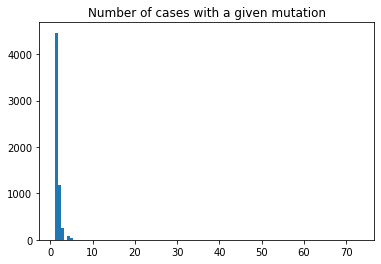

In [28]:
mutations_c = []
for gene in cases_w_mutations:
    mutations_c.append(len(cases_w_mutations[gene]))
    
import matplotlib.pyplot as plt
plt.hist(mutations_c, bins=100)
plt.title('Number of cases with a given mutation')

In [29]:
case_to_mutation = {}
for gene in cases_w_mutations:
    if len(cases_w_mutations[gene]) > 10:
        for c in cases_w_mutations[gene]:
            if case_to_mutation.get(c):
                case_to_mutation[c].append(gene)
            else:
                case_to_mutation[c] = [gene]
                
# Check how many patients only have one mutation
number_mutations = []
for c in case_to_mutation:
    number_mutations.append(len(case_to_mutation[c]))
    
# plt.hist(number_mutations, bins=20)
# plt.title("Number of mutations per case (if gene has 5 or more cases)")

## Get cases with specific mutations only

In [30]:
for c in case_to_mutation:
    if len(case_to_mutation[c]) == 1:
        print(case_to_mutation[c])

['BAP1']
['CSMD3']
['PBRM1']
['PBRM1']
['PBRM1']
['PBRM1']
['PBRM1']
['VHL']
['VHL']
['VHL']
['VHL']
['VHL']
['VHL']
['VHL']
['VHL']
['VHL']
['VHL']
['VHL']
['VHL']
['VHL']
['VHL']
['VHL']
['MUC16']
['MUC16']
['TTN']
['TTN']


## Visualise the mutation DFs



In [10]:
from sciviso import Heatmap
import numpy as np

# We need to read in the RNAseq dataframe (we read in the normalised counts Dataframe)
rna_df = pd.read_csv(f'{output_dir}CCRCC_Clark_Cell2019_rna_filtered_df.csv')
for c in rna_df.columns:
    if 'CPT' in c:
        rna_df[c] = np.log2(rna_df[c].values + 1)
gene_name = 'external_gene_name'

def plt_top_genes(rna_df, muts, cases_wo_muts, label='', gender='', n_genes=20):
    cols = [gene_name]
    for c in muts:
        for cd in rna_df.columns:
            if 'CPTAC' in cd and cd.split('_')[-2] == c:
                cols.append(cd)
                break
    c_i = 0
    for c in cases_wo_muts:
        for cd in rna_df.columns:
            if 'CPTAC' in cd and cd.split('_')[-2] == c and 'PrimaryTumor' in cd:
                cols.append(cd)
                c_i += 1
                break
        if c_i == len(muts):
            break

    cond_df = rna_df[cols].copy()
    values = cond_df[cols[1:]]
    var_vals = np.var(values, axis=1)
    cond_df['Variance'] = var_vals
    ko = cols[1:len(muts) + 1]
    wt = cols[len(muts) + 1:len(cond_df.columns)]
    change_v = np.mean(cond_df[ko].values, axis=1) - np.mean(cond_df[wt].values, axis=1)
    cond_df['mean_c'] = change_v
    col_colours = [len(wt) * ['r'] + len(ko) * ['b']]
    
    var_b = cond_df.nlargest(n_genes, 'mean_c')
    heatmap = Heatmap(var_b, cols[1:], gene_name, f'Largest genes {label}', '', col_colours=col_colours, label_font_size=12, figsize=(6, 5), linewidths=0.5, x_tick_labels=0, cluster_cols=False)
    heatmap.plot()
    plt.show()

    var_b = cond_df.nsmallest(n_genes, 'mean_c')
    heatmap = Heatmap(var_b, cols[1:], gene_name, f'Largest genes {label}', '', col_colours=col_colours, label_font_size=12, figsize=(6, 5), linewidths=0.5, x_tick_labels=0, cluster_cols=False)
    heatmap.plot()
    plt.show()

In [33]:
import numpy as np
genes_of_interest = ['MTOR', 'VHL', 'SETD2', 'PBRM1', 'KDM5C', 'TTN', 'BAP1']
mutations_to_cases = {}
all_cases_w_muts = []
for g in genes_of_interest:
    mutations_to_cases[g] = api.get_mutation_values_on_filter('case_id', [g], filter_col, exact=True)
    all_cases_w_muts += mutations_to_cases[g]
    
# Keep track of the cases without mutations
all_cases = clin_df[case_id].values
cases_wo_muts = [c for c in all_cases if c not in all_cases_w_muts]


In [ ]:

for g in genes_of_interest:
    plt_top_genes(rna_df, mutations_to_cases[g], cases_wo_muts, label=g, gender='', n_genes=20)


In [34]:
## Finally let's add a column to our clinical DF for each of the mutations
genes_of_interest = ['MTOR', 'VHL', 'SETD2', 'PBRM1', 'KDM5C', 'TTN', 'BAP1']

for g in genes_of_interest:
    mutation_col = []
    for case in clin_mod_df[case_id].values:
        if case in mutations_to_cases[g]:
            mutation_col.append(1) # has mutation
        else:
            mutation_col.append(0)
    clin_mod_df[f'{g}_mutation'] = mutation_col

In [41]:
[c for c, v in case_to_mutation.items() if 'PBRM1' in v and 'BAP1' in v]

[]

## Add molecular classes as well

In [35]:
mol_class_df = pd.read_csv(f'{data_dir}CIMP-status_Chr-stability_supp-download.csv')
cimp_pos = mol_class_df[mol_class_df['CIMP status'] == 'CIMP+']['Case ID'].values
unstable = mol_class_df[mol_class_df['Genome instability'] != 'Stable']['Case ID'].values
cimp_values = []
stability_values = []
for case in clin_mod_df[case_id].values:
    if case in cimp_pos:
        cimp_values.append(1)  # Is CIMP pos
    else:
        cimp_values.append(0)
    # Check stability
    if case in unstable:
        stability_values.append(1)
    else:
        stability_values.append(0)

clin_mod_df['CIMPStatus'] = cimp_values
clin_mod_df['GenomeInstability'] = stability_values

In [38]:
clin_mod_df['SafeCases'] = [c.replace('-', '.') for c in clin_mod_df['case_id'].values]
clin_mod_df.set_index('SafeCases', inplace=True)

In [43]:
clin_mod_df

,case_id,gender,TumorStage,AgeGrouped,BMIGrouped,RaceGrouped,MTOR_mutation,VHL_mutation,SETD2_mutation,PBRM1_mutation,KDM5C_mutation,TTN_mutation,BAP1_mutation,CIMPStatus,GenomeInstability
SafeCases,,,,,,,,,,,,,,,
C3L.00004,C3L-00004,Male,Stage III,old,normal,White,0,1,1,1,0,0,0,1,0
C3L.00010,C3L-00010,Male,Stage I,young,between,White,0,1,0,0,1,0,0,0,0
C3L.00011,C3L-00011,Female,Stage IV,old,between,White,0,1,0,0,1,1,0,1,1
C3L.00026,C3L-00026,Female,Stage I,old,between,White,0,1,0,0,0,1,0,0,0
C3L.00079,C3L-00079,Male,Stage III,middle,obese,White,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N.01646,C3N-01646,Male,Stage III,old,between,White,0,0,0,0,0,0,1,1,0
C3N.01648,C3N-01648,Male,Stage II,old,between,White,0,0,0,0,0,0,0,0,0
C3N.01649,C3N-01649,Male,Stage III,middle,obese,White,0,1,0,1,1,1,0,0,0


In [44]:
clin_mod_df.to_csv(f'{output_dir}clinical_sircle_13052022.csv')

In [42]:
output_dir

'../data/S050_CCRCC_Clark_Cell2019/sircle/'

In [15]:
# cols = [c for c in clin_mod_df.columns if 'mutation' not in c] + ['VHL_mutation', 'PBRM1_mutation', 'TTN_mutation', 'SETD2_mutation','MTOR_mutation', 
#        'KDM5C_mutation', 'BAP1_mutation', 'SETD2_mutation']
# clin_mod_df[cols].to_csv(f'{output_dir}clinical_sircle_v2.csv', index=False)

## Create groupings of patients

We're interested in how having groups of patients with the following 5 mutation "patterns":
1) VHL+TTN  
2) VHL-TTN  
3) VHL+PBRM1  
4) VHL-PBRM1  
5) PBRM1-VHL  

In [20]:
clin_mod_df = pd.read_csv(f'{output_dir}clinical_sircle_v2.csv')

In [21]:
vhl_and_ttn = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'TTN' in v]
vhl_no_ttn = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'TTN' not in v]
vhl_and_pbrm1 = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'PBRM1' in v]
vhl_no_pbrm1 = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'PBRM1' not in v]
pbrm1_no_vhl = [c for c, v in case_to_mutation.items() if 'VHL' not in v and 'PBRM1' in v]
vhl = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'PBRM1' not in v and 'TTN' not in v]
ttn_no_vhl = [c for c, v in case_to_mutation.items() if 'VHL' not in v and 'TTN' in v]
vhl_ttn_pbrm1 = [c for c, v in case_to_mutation.items() if 'VHL' not in v and 'TTN' in v and 'PBRM1' in v]

pbrm1 = [c for c, v in case_to_mutation.items() if 'PBRM1' in v]
bap1 = [c for c, v in case_to_mutation.items() if 'BAP1' in v]



In [22]:
def add_lbl(case_lst, label_name, df):
    cases = [1 if case in case_lst else 0 for case in df['case_id'].values]
    df[label_name] = cases
    return df


In [18]:
clin_comb = add_lbl(vhl_and_ttn, 'VHL+TTN', clin_mod_df)
clin_comb = add_lbl(vhl_no_ttn, 'VHL-TTN', clin_comb)
clin_comb = add_lbl(vhl_and_pbrm1, 'VHL+PBRM1', clin_comb)
clin_comb = add_lbl(vhl_no_pbrm1, 'VHL-PBRM1', clin_comb)
clin_comb = add_lbl(pbrm1_no_vhl, 'PBRM1-VHL', clin_comb)
clin_comb = add_lbl(vhl, 'VHL', clin_comb)
clin_comb = add_lbl(ttn_no_vhl, 'TTN-VHL', clin_comb)
clin_comb = add_lbl(vhl_ttn_pbrm1, 'TTN+PBRM1-VHL', clin_comb)
clin_comb = add_lbl(bap1, 'BAP1_mutation', clin_comb)


In [23]:
[c for c in clin_comb.columns]

['case_id',
 'gender',
 'TumorStage',
 'AgeGrouped',
 'BMIGrouped',
 'RaceGrouped',
 'CIMPStatus',
 'GenomeInstability',
 'VHL_mutation',
 'PBRM1_mutation',
 'TTN_mutation',
 'SETD2_mutation',
 'MTOR_mutation',
 'KDM5C_mutation',
 'BAP1_mutation',
 'SETD2_mutation.1',
 'VHL+TTN',
 'VHL-TTN',
 'VHL+PBRM1',
 'VHL-PBRM1',
 'PBRM1-VHL',
 'VHL',
 'TTN-VHL',
 'TTN+PBRM1-VHL',
 'PBRM1',
 'BAP1']

In [15]:
clin_comb.to_csv(f'{output_dir}clinical_sircle_BAP1.csv', index=False)

In [17]:
clin_comb

,case_id,gender,TumorStage,AgeGrouped,BMIGrouped,RaceGrouped,CIMPStatus,GenomeInstability,VHL_mutation,PBRM1_mutation,...,VHL+TTN,VHL-TTN,VHL+PBRM1,VHL-PBRM1,PBRM1-VHL,VHL,TTN-VHL,TTN+PBRM1-VHL,PBRM1,BAP1
0,C3L-00004,Male,Stage III,old,normal,White,1,0,1,1,...,0,1,1,0,0,0,0,0,1,0
1,C3L-00010,Male,Stage I,young,between,White,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
2,C3L-00011,Female,Stage IV,old,between,White,1,1,1,0,...,1,0,0,1,0,0,0,0,0,0
3,C3L-00026,Female,Stage I,old,between,White,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,C3L-00079,Male,Stage III,middle,obese,White,1,1,1,0,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,C3N-01646,Male,Stage III,old,between,White,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
106,C3N-01648,Male,Stage II,old,between,White,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,C3N-01649,Male,Stage III,middle,obese,White,0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
108,C3N-01651,Male,Stage II,old,between,White,1,1,1,1,...,1,0,1,0,0,0,0,0,1,0


In [21]:
clin_mod_df = clin_comb

### Adding numbers for Alluvial plot
Here we want to add the numbers to be able to understand how the patients flow through 
the alluvial plot.

In [22]:
import pandas as pd

# Stages are stage 1 or other stages
# Want to go through all the mutations (i.e. select the rows with 1 in that column)
ages = ['young' ,'middle', 'old']
cimps = [1, 0]
mutations = [c for c in clin_mod_df.columns if 'mutation' in c]
mutations

['MTOR_mutation',
 'VHL_mutation',
 'SETD2_mutation',
 'PBRM1_mutation',
 'KDM5C_mutation',
 'TTN_mutation',
 'BAP1_mutation']

(array([ 3.,  8.,  8., 24., 20., 21., 12.,  9.,  2.,  3.]),
 array([  0. ,  16.3,  32.6,  48.9,  65.2,  81.5,  97.8, 114.1, 130.4,
        146.7, 163. ]),
 <BarContainer object of 10 artists>)

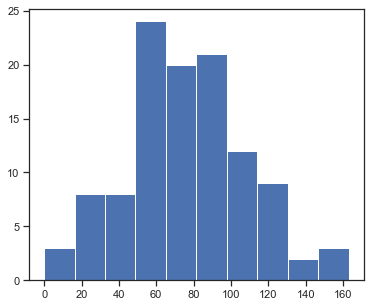

In [23]:
import matplotlib.pyplot as plt

mutations = ['VHL_mutation',
             'PBRM1_mutation',
             'TTN_mutation',
             'KDM5C_mutation',
             'MTOR_mutation',
             'BAP1_mutation',
             'SETD2_mutation']

clin_alluvial_df = pd.DataFrame()
cimps = []
for c in clin_mod_df['CIMPStatus'].values:
    if c == 1:
        cimps.append('+')
    else:
        cimps.append('-')

clin_alluvial_df['Stage'] = clin_mod_df['TumorStage'].values
clin_alluvial_df['Age'] = clin_mod_df['AgeGrouped'].values
clin_alluvial_df['CIMP'] = cimps
clin_alluvial_df['BMI'] = clin_mod_df['BMIGrouped'].values
clin_alluvial_df['Race'] = clin_mod_df['RaceGrouped'].values

for m in mutations:
    mod = []
    for c in clin_mod_df[m].values:
        if c == 1:
            mod.append('Y')
        else:
            mod.append('N')
    clin_alluvial_df[m.split('_')[0]] = mod

case_mutation_count = []
for c in clin_mod_df['case_id'].values:
    case_count = 0
    for gene, cases in cases_w_mutations.items():
        if c in cases:
            case_count += 1
    case_mutation_count.append(case_count)

plt.hist(case_mutation_count)

In [24]:
mutations_simple = []
for m in case_mutation_count:
    if m < 20:
        mutations_simple.append('<20')
    elif m < 40:
        mutations_simple.append('20-40')
    elif m < 60:
        mutations_simple.append('40-60')
    elif m < 80:
        mutations_simple.append('60-80')
    elif m < 100:
        mutations_simple.append('80-100')
    elif m < 120:
        mutations_simple.append('100-120')
    else:
        mutations_simple.append('>120')
clin_alluvial_df['Mutation count'] = mutations_simple


In [25]:
cols = ['TumorStage', 'AgeGrouped', 'CIMPStatus'] + mutations
cols = list(clin_alluvial_df.columns)
alluvial_2 = clin_alluvial_df.groupby(['Stage', 'Age', 'CIMP', 'VHL', 'PBRM1', 'TTN',
       'SETD2', 'BAP1', 'MTOR', 'KDM5C', 'Mutation count'],as_index=False).size()# clin_mod_df.groupby(cols,as_index=False).size()

In [26]:
alluvial_2.to_csv(f'{output_dir}alluvial_age_cimp_stage_mutations-grouped.csv', index=False)